# Exploratory Analysis

As a fan I wanted to have a little fun visulizing and exploring this LEC data set. If you see any mistakes let me know or maybe there is a question that I could have asked. 

credit: https://www.kaggle.com/stephenofarrell/league-of-legends-european-championship-2019

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000

In [2]:
raw_champion_data = pd.read_csv('lec_championdata.csv')
raw_match_data = pd.read_csv('lec_matchdata.csv')
raw_player_data = pd.read_csv('lec_playerdata.csv')

# Preprocessing

## Champion Data

In [3]:
champion_data = raw_champion_data.copy().drop(['Unnamed: 0', ' 0'], axis=1)
champion_data.head()

,Champion 1,∑ 2,W 3,L 4,WR 5,∑ 6,W 7,L 8,WR 9,∑ 10,W 11,L 12,WR 13,<25 games,<25 winrate,<25 win percentage,25-30 games,25-30 winrate,25-30 win percentage,30-35 games,30-35 winrate,30-35 win percentage,35-40 games,35-40 winrate,35-40 win percentage,40-45 games,40-45 winrate,40-45 win percentage,>45 games,>45 winrate,>45 win percentage,Split
0,Jarvan IV,44,22,22,50,15,8,7,53,29,14,15,48,2,1-1,50,16,9-7,56,10,4-6,40,5,3-2,60,9,5-4,56,2,0-2,0,Spring
1,Braum,44,19,25,43,23,10,13,43,21,9,12,43,4,4-0,100,12,3-9,25,16,7-9,44,4,0-4,0,7,4-3,57,1,1-0,100,Spring
2,Alistar,39,21,18,54,19,9,10,47,20,12,8,60,3,2-1,67,12,6-6,50,14,8-6,57,4,3-1,75,4,2-2,50,2,0-2,0,Spring
3,Lissandra,39,20,19,51,19,12,7,63,20,8,12,40,7,2-5,29,10,5-5,50,14,10-4,71,4,0-4,0,4,3-1,75,0,0-0,0,Spring
4,Ezreal,38,16,22,42,11,5,6,45,27,11,16,41,2,0-2,0,11,4-7,36,17,8-9,47,4,2-2,50,4,2-2,50,0,0-0,0,Spring


In [4]:
champion_data.describe(include='all')

,Champion 1,∑ 2,W 3,L 4,WR 5,∑ 6,W 7,L 8,WR 9,∑ 10,W 11,L 12,WR 13,<25 games,<25 winrate,<25 win percentage,25-30 games,25-30 winrate,25-30 win percentage,30-35 games,30-35 winrate,30-35 win percentage,35-40 games,35-40 winrate,35-40 win percentage,40-45 games,40-45 winrate,40-45 win percentage,>45 games,>45 winrate,>45 win percentage,Split
count,194,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194,194.000000,194.000000,194,194.000000,194.000000,194,194.000000,194.000000,194,194.000000,194.000000,194,194.000000,194.000000,194,194.000000,194
unique,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,49,NaN,NaN,49,NaN,NaN,32,NaN,NaN,23,NaN,NaN,7,NaN,2
top,Trundle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-0,NaN,NaN,0-0,NaN,NaN,0-0,NaN,NaN,0-0,NaN,NaN,0-0,NaN,NaN,0-0,NaN,Summer
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88,NaN,NaN,47,NaN,NaN,40,NaN,NaN,84,NaN,NaN,87,NaN,NaN,148,NaN,99
mean,NaN,11.701031,5.850515,5.850515,48.463918,5.850515,3.092784,2.757732,44.541237,5.850515,2.757732,3.092784,37.314433,1.185567,NaN,26.773196,3.247423,NaN,39.768041,3.762887,NaN,38.278351,1.804124,NaN,27.273196,1.391753,NaN,28.360825,0.309278,NaN,12.541237,NaN
std,NaN,12.395608,6.432054,6.407033,28.149697,6.337104,3.495615,3.234860,33.863653,6.741975,3.435274,3.701512,30.968296,1.532582,NaN,38.953009,3.726480,NaN,40.000295,4.175609,NaN,35.023084,2.466939,NaN,36.952183,1.772307,NaN,37.910362,0.608418,NaN,32.237475,NaN
min,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN
25%,NaN,2.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,0.000000,1.000000,NaN,0.000000,1.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN
50%,NaN,6.000000,3.500000,3.000000,50.000000,3.000000,2.000000,1.000000,50.000000,4.000000,1.000000,2.000000,40.000000,1.000000,NaN,0.000000,2.000000,NaN,33.000000,2.000000,NaN,38.000000,1.000000,NaN,0.000000,1.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN
75%,NaN,17.000000,9.000000,8.000000,64.750000,9.000000,5.000000,4.750000,63.750000,8.000000,4.000000,4.000000,55.000000,2.000000,NaN,50.000000,5.000000,NaN,75.000000,5.000000,NaN,62.750000,3.000000,NaN,50.000000,2.000000,NaN,50.000000,0.000000,NaN,0.000000,NaN


#### It looks like duplicate champions in this dataset is caused by data seperation caused by the split. This should not be a problem if we keep this in mind during our analysis.

In [5]:
pd.concat(g for _, g in champion_data.groupby("Champion 1") if len(g) > 1).head()

,Champion 1,∑ 2,W 3,L 4,WR 5,∑ 6,W 7,L 8,WR 9,∑ 10,W 11,L 12,WR 13,<25 games,<25 winrate,<25 win percentage,25-30 games,25-30 winrate,25-30 win percentage,30-35 games,30-35 winrate,30-35 win percentage,35-40 games,35-40 winrate,35-40 win percentage,40-45 games,40-45 winrate,40-45 win percentage,>45 games,>45 winrate,>45 win percentage,Split
9,Aatrox,30,14,16,47,20,11,9,55,10,3,7,30,3,1-2,33,7,3-4,43,7,2-5,29,8,4-4,50,4,3-1,75,1,1-0,100,Spring
99,Aatrox,41,16,25,39,28,11,17,39,13,5,8,38,1,0-1,0,9,6-3,67,16,8-8,50,10,1-9,10,5,1-4,20,0,0-0,0,Summer
34,Akali,12,5,7,42,8,4,4,50,4,1,3,25,3,1-2,33,4,2-2,50,4,1-3,25,0,0-0,0,1,1-0,100,0,0-0,0,Spring
98,Akali,43,23,20,53,22,12,10,55,21,11,10,52,5,4-1,80,13,4-9,31,13,5-8,38,10,8-2,80,2,2-0,100,0,0-0,0,Summer
2,Alistar,39,21,18,54,19,9,10,47,20,12,8,60,3,2-1,67,12,6-6,50,14,8-6,57,4,3-1,75,4,2-2,50,2,0-2,0,Spring


## Match Data

In [6]:
match_data = raw_match_data.copy().drop('Unnamed: 0', axis=1)
match_data.head()

,Team1,Team2,Result,UTC,PBP,Color,MVP,Blue,Red,Sel,Choice,Day,Time
0,G2 Esports,Splyce,True,2019-06-07,Quickshot,Ender,Jankos,G2,SPY,G2,1,Fri,NaN
1,Team Vitality,Origen,False,2019-06-07,Quickshot,Ender,Patrik,OG,VIT,VIT,0,Fri,NaN
2,Rogue,Misfits Gaming,False,2019-06-07,Drakos,Froskurinn,Hans Sama,RGE,MSF,RGE,1,Fri,NaN
3,Fnatic,SK Gaming,True,2019-06-07,Drakos,Froskurinn,Rekkles,FNC,SK,FNC,1,Fri,NaN
4,FC Schalke 04,Excel Esports,True,2019-06-07,Drakos,Froskurinn,Trick,S04,XL,S04,1,Fri,NaN


In [7]:
match_data = match_data.drop('Time', axis=1)

In [8]:
match_data.describe(include='all')

,Team1,Team2,Result,UTC,PBP,Color,MVP,Blue,Red,Sel,Choice,Day
count,182,182,182,182,182,182,180,182,182,182,182.000000,182
unique,10,10,2,36,3,16,51,10,10,10,NaN,2
top,SK Gaming,Splyce,False,2019-03-16,Medic,Vedius,Jankos,G2,VIT,SK,NaN,Sat
freq,24,22,101,6,71,53,11,25,24,24,NaN,92
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.730769,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444784,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN


## Player Data

In [9]:
player_data = raw_player_data.copy().drop('Unnamed: 0', axis=1)
player_data.head()

,Player,Team,Pos,GP,W%,K,D,A,KDA,KP,DTH%,FB%,GD10,XPD10,CSD10,CSPM,CS%P15,DPM,DMG%,EGPM,Gold%,WPM,WCPM,Split
0,Abbedagge,Schalke 04,Middle,19.0,47.0,41.0,43.0,79.0,2.8,63.2,21.9,11.0,-115.0,-125.0,-3.3,9.0,26.6,417.0,24.6,257.9,22.5,0.51,0.19,Spring Regular
1,Alphari,Origen,Top,18.0,67.0,29.0,30.0,73.0,3.4,51.8,19.4,11.0,133.0,36.0,1.7,8.0,22.4,354.0,21.8,243.5,20.9,0.54,0.15,Spring Regular
2,Attila,Vitality,ADC,18.0,56.0,48.0,30.0,77.0,4.2,60.1,14.9,11.0,-112.0,-22.0,-3.9,10.2,33.4,458.0,25.6,316.7,26.9,0.35,0.39,Spring Regular
3,Broxah,Fnatic,Jungle,18.0,61.0,49.0,27.0,93.0,5.3,66.7,15.5,33.0,160.0,33.0,-1.8,5.0,13.2,255.0,14.9,200.1,17.1,0.36,0.34,Spring Regular
4,Bwipo,Fnatic,Top,18.0,61.0,41.0,42.0,80.0,2.9,56.8,24.1,17.0,-275.0,-133.0,-10.0,7.6,23.6,444.0,25.5,239.7,20.4,0.48,0.16,Spring Regular


In [10]:
player_data.describe(include='all')

,Player,Team,Pos,GP,W%,K,D,A,KDA,KP,DTH%,FB%,GD10,XPD10,CSD10,CSPM,CS%P15,DPM,DMG%,EGPM,Gold%,WPM,WCPM,Split
count,221,221,221,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221
unique,74,10,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,Caps,Fnatic,Middle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer Regular
freq,7,32,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79
mean,NaN,NaN,NaN,10.769231,47.669683,27.909502,27.954751,60.312217,3.748416,62.538914,19.767421,22.565611,-36.751131,-23.180995,-0.627149,6.389593,19.987330,369.900452,19.955204,232.807240,19.959276,0.674525,0.262172,NaN
std,NaN,NaN,NaN,6.587602,28.618405,22.987960,17.402658,42.786226,3.470874,8.713064,5.881460,19.179096,369.681529,274.355797,9.908811,3.125617,10.246011,162.910458,7.724985,75.567291,6.083156,0.394603,0.115297,NaN
min,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.300000,17.600000,0.000000,0.000000,-2312.000000,-1311.000000,-53.000000,0.700000,2.800000,101.000000,5.400000,83.700000,8.900000,0.190000,0.000000,NaN
25%,NaN,NaN,NaN,4.000000,30.000000,8.000000,12.000000,24.000000,2.200000,57.700000,16.300000,9.000000,-129.000000,-133.000000,-3.900000,4.400000,11.200000,236.000000,12.700000,176.200000,15.300000,0.430000,0.170000,NaN
50%,NaN,NaN,NaN,11.000000,50.000000,22.000000,28.000000,57.000000,3.000000,64.100000,20.000000,20.000000,-17.000000,-16.000000,-0.400000,7.700000,23.100000,389.000000,22.500000,242.900000,21.400000,0.480000,0.250000,NaN
75%,NaN,NaN,NaN,18.000000,61.000000,43.000000,42.000000,89.000000,4.200000,68.400000,23.500000,33.000000,106.000000,100.000000,3.400000,8.900000,28.100000,467.000000,26.100000,287.300000,25.000000,0.760000,0.340000,NaN


#### It looks like the reason for the 74 unique values with 221 count value is because players played multiple positions and the different splits.  

In [11]:
pd.concat(g for _, g in player_data.groupby("Player") if len(g) > 1).head()

,Player,Team,Pos,GP,W%,K,D,A,KDA,KP,DTH%,FB%,GD10,XPD10,CSD10,CSPM,CS%P15,DPM,DMG%,EGPM,Gold%,WPM,WCPM,Split
0,Abbedagge,Schalke 04,Middle,19.0,47.0,41.0,43.0,79.0,2.8,63.2,21.9,11.0,-115.0,-125.0,-3.3,9.0,26.6,417.0,24.6,257.9,22.5,0.51,0.19,Spring Regular
92,Abbedagge,Schalke 04,Middle,18.0,61.0,65.0,43.0,115.0,4.2,65.5,22.1,11.0,-60.0,159.0,-1.3,8.8,26.4,509.0,27.7,284.9,24.2,0.46,0.20,Summer Regular
171,Abbedagge,Schalke 04,Middle,11.0,55.0,50.0,31.0,63.0,3.6,59.5,21.4,36.0,-30.0,169.0,-1.4,8.7,27.5,532.0,27.2,288.3,25.1,0.46,0.26,Summer Playoffs
201,Abbedagge,Schalke 04,Middle,3.0,0.0,7.0,14.0,6.0,0.9,44.8,26.9,0.0,-671.0,-177.0,-12.7,7.1,23.6,396.0,25.5,200.1,20.5,0.53,0.06,Gauntlet
1,Alphari,Origen,Top,18.0,67.0,29.0,30.0,73.0,3.4,51.8,19.4,11.0,133.0,36.0,1.7,8.0,22.4,354.0,21.8,243.5,20.9,0.54,0.15,Spring Regular


# Analysis

## Average Damage Done by Role

In [12]:
damage_data = player_data.copy()

In [13]:
damage_data['Pos'].unique()

array(['Middle', 'Top', 'ADC', 'Jungle', 'Support'], dtype=object)

In [14]:
dmg = []
for i in damage_data['Pos'].unique():
    dmg_by_role = damage_data['Pos'] == i
    dmg_by_role = damage_data[dmg_by_role]
    dmg_by_role = dmg_by_role['DMG%']
    dmg.append(dmg_by_role.aggregate('mean'))

In [15]:
dmg = {'Dmg%':dmg, 'Role':damage_data['Pos'].unique()}
df = pd.DataFrame(data=dmg)
df.set_index('Role')

,Dmg%
Role,
Middle,26.218367
Top,23.527907
ADC,25.925000
Jungle,14.305128
Support,9.023913


#### This chart contains results that were around what was expected, it is interesting how Jungle is such an agressive role but because of the play style in pro play junglers tend to not have high Dmg% contribution. 

Text(0.5, 1.0, 'Average Damage Grouped by Role')

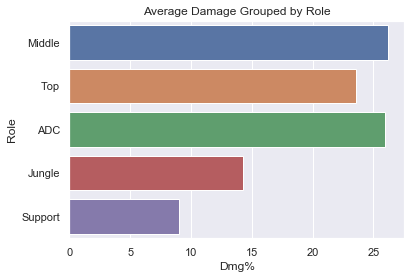

In [16]:
sns.barplot(x=df['Dmg%'], y=df['Role'])
plt.title('Average Damage Grouped by Role')

## Average Damage Done by Players

In [17]:
team_data = player_data.copy()

In [18]:
team_data['Team'].unique()

array(['Schalke 04', 'Origen', 'Vitality', 'Fnatic', 'Excel Esports',
       'G2 Esports', 'SK Gaming', 'Misfits', 'Rogue', 'Splyce'],
      dtype=object)

In [19]:
dmg = []
for i in team_data['Team'].unique():
    dmg_by_team = team_data['Team'] == i
    dmg_by_team = team_data[dmg_by_team]
    dmg_by_team = dmg_by_team['DMG%']
    dmg.append(dmg_by_team.aggregate('mean'))

In [20]:
dmg = {'Dmg%':dmg, 'Team':team_data['Team'].unique()}
df = pd.DataFrame(data=dmg)
df.set_index('Team')

,Dmg%
Team,
Schalke 04,19.995000
Origen,19.995000
Vitality,20.654545
Fnatic,20.428125
Excel Esports,19.950000
G2 Esports,19.136667
SK Gaming,20.312500
Misfits,19.037500
Rogue,19.936842


#### For me this chart was a little surprising, seeing that G2 Esports is among the teams that did the least amount of damage. Which may indicate that G2 a known agressive team might have some players that may be dealing lower amount of damage than the average.

Text(0.5, 1.0, 'Average Damage Grouped by Team')

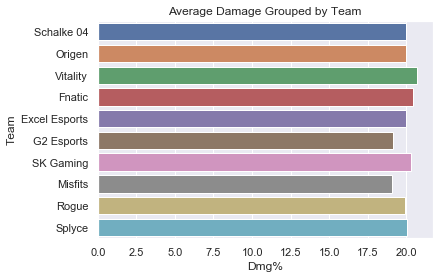

In [21]:
sns.barplot(x=df['Dmg%'], y=df['Team'])
plt.title('Average Damage Grouped by Team')

#### Looking further into this it seems like G2 really does have a player that has the lowest DMG% contribution and it turns out to be Caps on ADC which explains the low DMG% contribution. Caps is primarily a mid laner as such this number can be explained.

In [22]:
dmg_by_team = team_data['Team'] == 'G2 Esports'
dmg_by_team = team_data[dmg_by_team]
dmg_by_team = dmg_by_team[['Team', 'Player', 'DMG%', 'Pos']]
dmg_by_team.aggregate(['min', 'max']).rename(index={'min':'min_g2', 'max':'max_g2'}).append(team_data[['Team', 'Player', 'DMG%', 'Pos']]
                                             .aggregate(['min', 'max'])
                                             .rename(index={'min':'min_all', 'max':'max_all'}))

,Team,Player,DMG%,Pos
min_g2,G2 Esports,Caps,5.4,ADC
max_g2,G2 Esports,promisq,29.5,Top
min_all,Excel Esports,Abbedagge,5.4,ADC
max_all,Vitality,sOAZ,47.9,Top


## Side Selection

In [23]:
side_selection = match_data.copy()

In [24]:
side_selection['Choice'].value_counts()

1    133
0     49
Name: Choice, dtype: int64

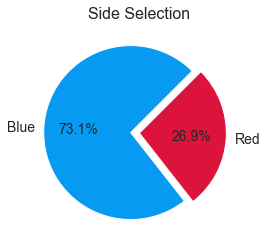

In [25]:
labels = 'Blue', 'Red'
choice = side_selection['Choice'].value_counts()
colors = ['xkcd:azure', 'crimson']
explode = (0.1, 0)  

plt.pie(choice, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=45, textprops={'fontsize': 14})

plt.title("Side Selection", fontsize=16)
plt.show()

In [26]:
win_with_selec = side_selection.loc[:, ('Team1', 'Team2', 'Sel', 'Choice', 'Result')]
win_with_selec.loc[:, ('Result')] = side_selection.loc[:, ('Result')].map({True:1, False:0})

win_with_selec = 1 == win_with_selec['Result']
win_with_selec = side_selection[win_with_selec]

#### As Blue side is the favorable side to pick it is no surprise that teams won more by picking it. However the data also shows that teams opted to picking red side in some cases. 

In [27]:
 win_with_selec['Choice'].value_counts()

1    63
0    18
Name: Choice, dtype: int64

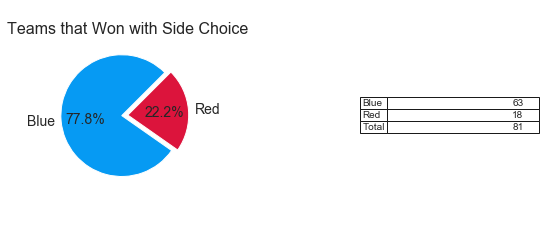

In [28]:
labels = 'Blue', 'Red'
choice = win_with_selec['Choice'].value_counts()
colors = ['xkcd:azure', 'crimson']
explode = (0.1, 0)  

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.pie(choice, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=45, textprops={'fontsize': 14})
ax1.set_title("Teams that Won with Side Choice", fontsize=16)

ax2.table(cellText=[['63'],["18"], ['81']], rowLabels=['Blue', 'Red', 'Total'], loc='right')
ax2.axis('off')

plt.show()

In [29]:
win_without_selec = side_selection.loc[:, ('Team1', 'Team2', 'Sel', 'Choice', 'Result')]
win_without_selec.loc[:, ('Result')] = side_selection.loc[:, ('Result')].map({True:1, False:0})

win_without_selec = 0 == win_without_selec['Result']
win_without_selec = side_selection[win_without_selec]

In [30]:
table_df = pd.DataFrame(data=win_without_selec['Choice'].map({1:0, 0:1}).value_counts())
table_df = table_df.rename(index={0:'Red', 1:'Blue'})

table_df.index.name = "Side"

#### This chart actually shows the opposite of what we found in the previous chart. While the majority of the teams here picked Blue side, the team on Red side seems to have a significantly more wins. This indicates that although Blue side may give teams a stragtegic advantage it is not significant enough to decide games. 

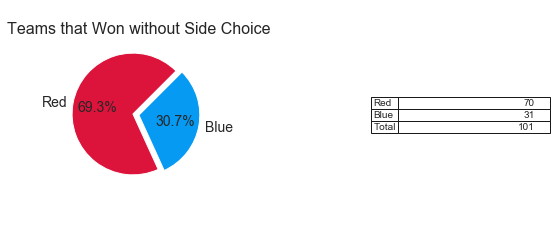

In [31]:
labels = 'Red', 'Blue'
choice = win_without_selec['Choice'].value_counts()
colors = ['crimson', 'xkcd:azure']
explode = (0.1, 0)  

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.pie(choice, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=45, textprops={'fontsize': 14})
ax1.set_title("Teams that Won without Side Choice", fontsize=16)

ax2.table(cellText=[['70'],["31"], ['101']], rowLabels=['Red', 'Blue', 'Total'], loc='right', snap=True)
ax2.axis('off')


plt.show()

## Day of the week affect

In [32]:
day_effect = match_data.copy()
team_names = []

for i, j, k in zip(day_effect['Result'], day_effect['Team1'], day_effect['Team2']):
    if i:
        team_names.append(j)
    else:
        team_names.append(k)
        
day_effect['team_that_won'] = team_names

In [33]:
day_effect['team_that_won'].unique()

array(['G2 Esports', 'Origen', 'Misfits Gaming', 'Fnatic',
       'FC Schalke 04', 'Rogue', 'SK Gaming', 'Splyce', 'Team Vitality',
       'Excel Esports'], dtype=object)

#### This data was mostly plotted out of curiosity to see if there was any teams that performed better on a certain day of the week. Interpret this graph as you will. 

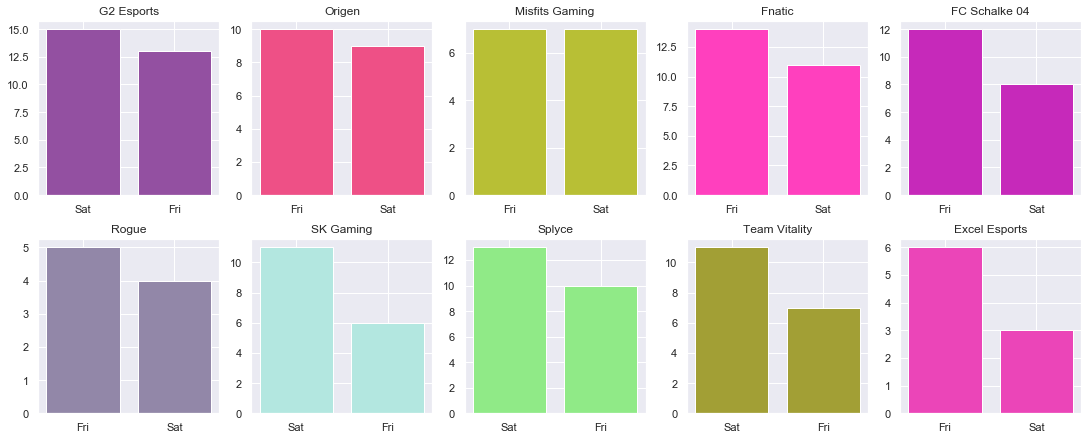

In [34]:
team_win = []
fig, axs = plt.subplots(2, 5, figsize=(15, 6), constrained_layout=True)
plot_data = []

for i, j in zip(day_effect['team_that_won'], day_effect['team_that_won'].unique()):
    team_win = day_effect['team_that_won'] == j
    team_win = day_effect[team_win]
    x = team_win['Day'].value_counts().index
    y = team_win['Day'].value_counts().values
    plot_data.append((x,y, j))
    
i = 0
k = 0
for j in plot_data:
    axs[i,k].bar(x=j[0], height=j[1], color=np.random.rand(1,3))
    axs[i, k].set_title(j[2])
    k += 1
    if(k > 4):
        i += 1
        k = 0   

## Champion Statistics

#### For the win rates I only considered champions that were played more than 5 times

### Average Champion Win Rate

In [75]:
champ_stats = champion_data.copy()

avg_win_rate = champ_stats['∑ 2'] > 5
avg_win_rate = champ_stats[avg_win_rate]
avg_win_rate.sort_values(by=['WR 5'], ascending=False).head(10).reset_index(drop=True).loc[:, ('Champion 1', 'W 3', 'L 4', 'WR 5')]

,Champion 1,W 3,L 4,WR 5
0,Skarner,7,0,100
1,Jax,7,1,88
2,Vayne,12,2,86
3,Swain,5,1,83
4,Olaf,13,4,76
5,Kled,8,3,73
6,Xayah,8,3,73
7,Rakan,15,6,71
8,Qiyana,13,6,68
9,Varus,4,2,67


### Chamption Win Rate Spring

In [76]:
spring = champ_stats['Split'] == 'Spring'
spring = champ_stats[spring]
spring = champ_stats['∑ 6'] > 5
spring = champ_stats[spring]
spring.sort_values(by=['WR 9'], ascending=False).head(10).reset_index(drop=True).loc[:, ('Champion 1', 'W 7', 'L 8', 'WR 9')]

,Champion 1,W 7,L 8,WR 9
0,Xayah,6,0,100
1,Rakan,10,0,100
2,Syndra,6,1,86
3,Olaf,8,2,80
4,LeBlanc,8,2,80
5,Elise,6,2,75
6,Morgana,6,2,75
7,Irelia,6,2,75
8,Lee Sin,9,3,75
9,Kled,5,2,71


### Chamption Win Rate Summer

In [77]:
summer = champ_stats['Split'] == 'Summer'
summer = champ_stats[summer]
summer = champ_stats['∑ 10'] > 5
summer = champ_stats[summer]
summer.sort_values(by=['WR 13'], ascending=False).head(10).reset_index(drop=True).loc[:, ('Champion 1', 'W 11', 'L 12', 'WR 13')]

,Champion 1,W 11,L 12,WR 13
0,Jax,6,1,86
1,Vayne,8,2,80
2,Olaf,5,2,71
3,Jayce,5,2,71
4,Qiyana,7,3,70
5,Karma,7,3,70
6,Corki,11,5,69
7,Tahm Kench,13,6,68
8,Jarvan IV,12,6,67
9,Poppy,4,2,67
